In [1]:
import numpy as np
from scipy import linalg   # Linear Algebra Library
import matplotlib.pyplot as plt

In [2]:
def init_P_Q(file_dir, k):
  """
  initialize matrices P and Q with random weights between (0, (5 / k)**0.5)
  """

  Q = {}
  P = {}

  multiplier = np.sqrt((5.0 / float(k)))
  with open(file_dir) as f:
    for line in f.readlines():
      user, movie, rating = [int(val) for val in line.split()]
      if user in P:
        pass
      else:
        P[user] = np.random.rand(k) * multiplier
      if movie in Q:
        pass
      else:
        Q[movie] = np.random.rand(k) * multiplier

  return P, Q

In [10]:
file_dir = "/home/ljj0512/private/workspace/data-mining/09_Recommendation-System/ratings.train.txt"
P, Q = init_P_Q(file_dir, 20)
print(len(P))
print(len(Q))

943
0.44248222580489904
1668


In [3]:
def get_error(rating, q_i, p_u):
  """
  Returns the error score for (i, u) entry in matrix R
  rating = true movie rating score that user u gave for movie i
  q_i = ith row of matrix Q
  p_u = uth row of matrix P
  """

  return (rating - np.dot(q_i, np.transpose(p_u)))**2

In [4]:
def run_iter(file_dir, P, Q, l, u):
  """
  Performs 1 iteration of stochastic gradient descent algorithm
  """
  with open(file_dir) as f:
    lines = f.readlines()
    for idx in range(len(lines)):
      user, movie, rating = [int(val) for val in lines[idx].split()]
      # Do SGD
      error_deriv = 2.0 * (rating - np.dot(Q[movie], np.transpose(P[user])))
      new_Q = Q[movie] + u * (error_deriv * P[user] - 2.0 * l * Q[movie])
      new_P = P[user] + u * (error_deriv * Q[movie] - 2.0 * l * P[user])
      Q[movie] = new_Q
      P[user] = new_P
    # Calculate error after full iteration
    error = 0.0
    for idx in range(len(lines)):
      user, movie, rating = [int(val) for val in lines[idx].split()]
      # Add to total error
      # print rating, user, movie, np.dot(Q[movie], P[user])
      error += get_error(rating, Q[movie], P[user])
    for user in P:
      error += l * np.linalg.norm(P[user])**2
    for user in Q:
      error += l * np.linalg.norm(Q[movie])**2
    return P, Q, error

Error after 1 iteration: 85598.8392922642
Error after 2 iteration: 83822.45418580284
Error after 3 iteration: 82490.96245040908
Error after 4 iteration: 80493.26214983803
Error after 5 iteration: 77948.40266728945
Error after 6 iteration: 75488.20994919703
Error after 7 iteration: 73213.68511514277
Error after 8 iteration: 71033.42078863786
Error after 9 iteration: 68947.08840027393
Error after 10 iteration: 67003.84930893815
Error after 11 iteration: 65244.776822531414
Error after 12 iteration: 63684.17874463031
Error after 13 iteration: 62315.107756823425
Error after 14 iteration: 61119.9792987475
Error after 15 iteration: 60077.94051161042
Error after 16 iteration: 59168.548630325175
Error after 17 iteration: 58373.25920854146
Error after 18 iteration: 57675.85168680534
Error after 19 iteration: 57062.386029827314
Error after 20 iteration: 56520.977410250656
Error after 21 iteration: 56041.52331047753
Error after 22 iteration: 55615.44121582614
Error after 23 iteration: 55235.437258

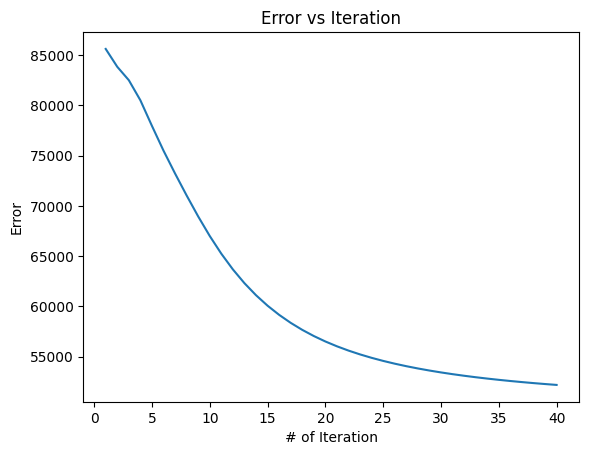

In [11]:
# file_dir = '/content/drive/MyDrive/HW2-3,4/q3/data/ratings.train.txt'
file_dir = "/home/ljj0512/private/workspace/data-mining/09_Recommendation-System/ratings.train.txt"
u = 0.015
k = 20
l = 0.1

P, Q = init_P_Q(file_dir, k)
error_list = []
for i in range(40):
  P, Q, error = run_iter(file_dir, P, Q, l, u)
  error_list.append(error)
  print("Error after {} iteration: {}".format(i + 1, error))

x = [i + 1 for i in range(40)]
y = error_list
plt.plot(x, y)
plt.xlabel("# of Iteration")
plt.ylabel("Error")
plt.title("Error vs Iteration")
plt.show()

In [12]:
def run_iter(file_dir, P, Q, l, u):
  """
  Performs 1 iteration of stochastic gradient descent algorithm
  """
  with open(file_dir) as f:
    lines = f.readlines()
    for idx in range(len(lines)):
      user, movie, rating = [int(val) for val in lines[idx].split()]
      # Do SGD
      error_deriv = 2.0 * (rating - np.dot(Q[movie], np.transpose(P[user])))
      new_Q = Q[movie] - u * (error_deriv * P[user] + 2.0 * l * Q[movie])
      new_P = P[user] - u * (error_deriv * Q[movie] + 2.0 * l * P[user])
      Q[movie] = new_Q
      P[user] = new_P
    # Calculate error after full iteration
    error = 0.0
    for idx in range(len(lines)):
      user, movie, rating = [int(val) for val in lines[idx].split()]
      # Add to total error
      # print rating, user, movie, np.dot(Q[movie], P[user])
      error += get_error(rating, Q[movie], P[user])
    for user in P:
      error += l * np.linalg.norm(P[user])**2
    for user in Q:
      error += l * np.linalg.norm(Q[movie])**2
    return P, Q, error

/tmp/ipykernel_105002/2084720498.py:12: RuntimeWarning: overflow encountered in multiply
  new_P = P[user] - u * (error_deriv * Q[movie] + 2.0 * l * P[user])
/tmp/ipykernel_105002/2084720498.py:11: RuntimeWarning: overflow encountered in multiply
  new_Q = Q[movie] - u * (error_deriv * P[user] + 2.0 * l * Q[movie])
/tmp/ipykernel_105002/2084720498.py:12: RuntimeWarning: invalid value encountered in add
  new_P = P[user] - u * (error_deriv * Q[movie] + 2.0 * l * P[user])
/tmp/ipykernel_105002/2084720498.py:11: RuntimeWarning: invalid value encountered in add
  new_Q = Q[movie] - u * (error_deriv * P[user] + 2.0 * l * Q[movie])


Error after 1 iteration: nan
Error after 2 iteration: nan
Error after 3 iteration: nan
Error after 4 iteration: nan
Error after 5 iteration: nan
Error after 6 iteration: nan
Error after 7 iteration: nan
Error after 8 iteration: nan
Error after 9 iteration: nan
Error after 10 iteration: nan
Error after 11 iteration: nan
Error after 12 iteration: nan
Error after 13 iteration: nan
Error after 14 iteration: nan
Error after 15 iteration: nan
Error after 16 iteration: nan
Error after 17 iteration: nan
Error after 18 iteration: nan
Error after 19 iteration: nan
Error after 20 iteration: nan
Error after 21 iteration: nan
Error after 22 iteration: nan
Error after 23 iteration: nan
Error after 24 iteration: nan
Error after 25 iteration: nan
Error after 26 iteration: nan
Error after 27 iteration: nan
Error after 28 iteration: nan
Error after 29 iteration: nan
Error after 30 iteration: nan
Error after 31 iteration: nan
Error after 32 iteration: nan
Error after 33 iteration: nan
Error after 34 iter

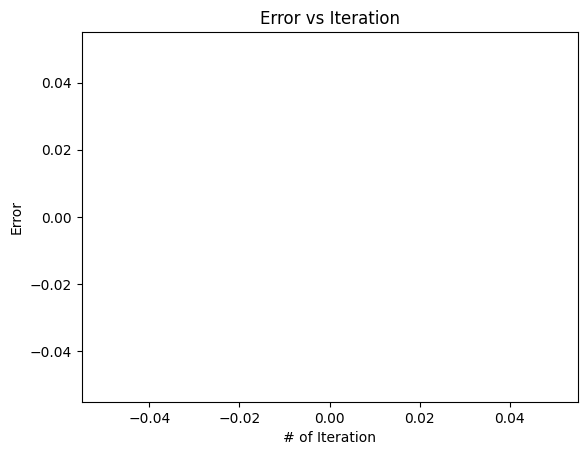

In [13]:
# file_dir = '/content/drive/MyDrive/HW2-3,4/q3/data/ratings.train.txt'
file_dir = "/home/ljj0512/private/workspace/data-mining/09_Recommendation-System/ratings.train.txt"
u = 0.015
k = 20
l = 0.1

P, Q = init_P_Q(file_dir, k)
error_list = []
for i in range(40):
  P, Q, error = run_iter(file_dir, P, Q, l, u)
  error_list.append(error)
  print("Error after {} iteration: {}".format(i + 1, error))

x = [i + 1 for i in range(40)]
y = error_list
plt.plot(x, y)
plt.xlabel("# of Iteration")
plt.ylabel("Error")
plt.title("Error vs Iteration")
plt.show()